<a href="https://colab.research.google.com/github/Haniaakanwal/DIP-TASK/blob/main/DIP_TASK3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving IMG-20251029-WA0025.jpg to IMG-20251029-WA0025 (1).jpg


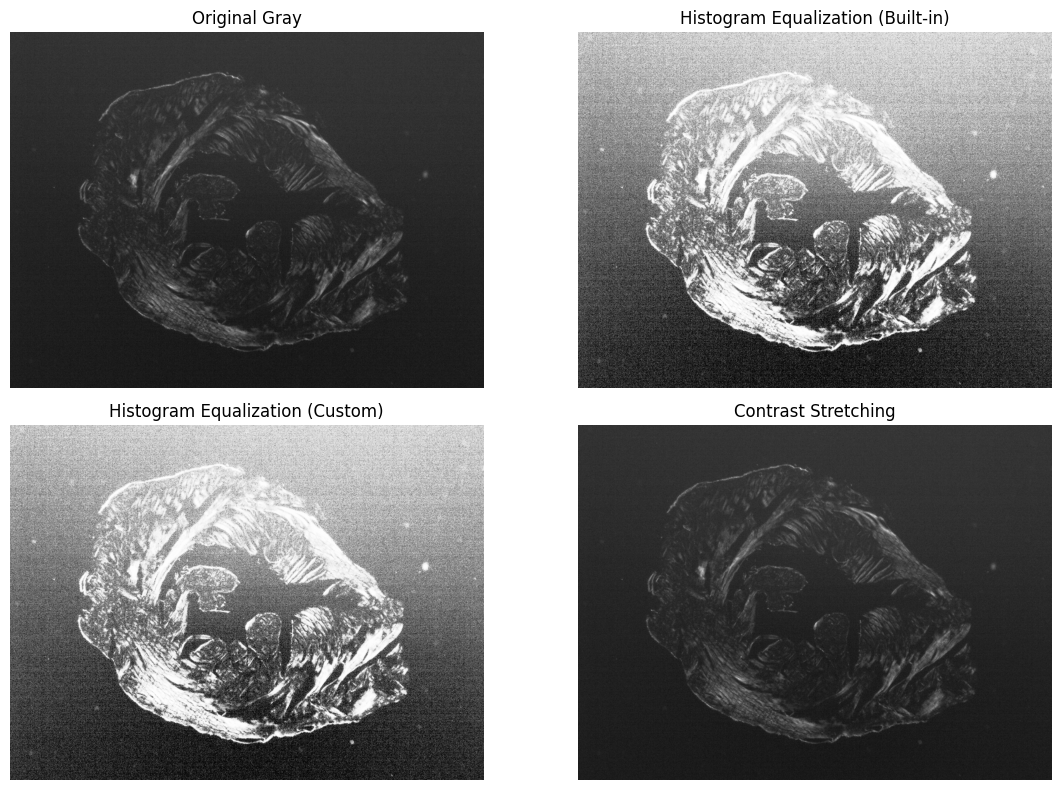

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from io import BytesIO

# ---------------------------
# 0️⃣ Upload Image
# ---------------------------
uploaded = files.upload()  # Will open upload dialog
if not uploaded:
    raise Exception("No image uploaded!")

# Get first uploaded file
file_name = list(uploaded.keys())[0]
file_bytes = BytesIO(uploaded[file_name]).read()

# Read image from bytes
img = cv2.imdecode(np.frombuffer(file_bytes, np.uint8), cv2.IMREAD_COLOR)
if img is None:
    raise Exception("Failed to read image.")

# ---------------------------
# 1️⃣ Convert to Grayscale
# ---------------------------
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ---------------------------
# 2️⃣ Built-in Histogram Equalization
# ---------------------------
hist_eq_builtin = cv2.equalizeHist(gray)

# ---------------------------
# 3️⃣ Custom Histogram Equalization
# ---------------------------
def custom_hist_equalization(image):
    hist, _ = np.histogram(image.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf, 0)  # Mask zeros
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')
    return cdf_final[image]

hist_eq_custom = custom_hist_equalization(gray)

# ---------------------------
# 4️⃣ Contrast Stretching
# ---------------------------
def contrast_stretch(image):
    min_val = np.min(image)
    max_val = np.max(image)
    stretched = ((image - min_val) / (max_val - min_val) * 255).astype(np.uint8)
    return stretched

contrast_img = contrast_stretch(gray)

# ---------------------------
# 5️⃣ Visualization
# ---------------------------
plt.figure(figsize=(12, 8))

titles = ['Original Gray', 'Histogram Equalization (Built-in)',
          'Histogram Equalization (Custom)', 'Contrast Stretching']
images = [gray, hist_eq_builtin, hist_eq_custom, contrast_img]

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

